IMPORTING ALL THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,RandomizedSearchCV

LOADING THE TRAIN DATA INTO A DATAFRAME

In [2]:
train_data = pd.read_csv("C:/Users/CHUKS/Downloads/free-ai-classes-in-every-city-hackathon-2023/Housing_dataset_train.csv")
train_data

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,NaN,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,NaN,6.0,1.0,3348918.718


In [3]:
#To provide a summary of the dataframe structure,including the number of non-null values, data types
# and memory usage. To quickly understand the data, identify missing values and know the data type of
# each column.

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [4]:
train_data.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


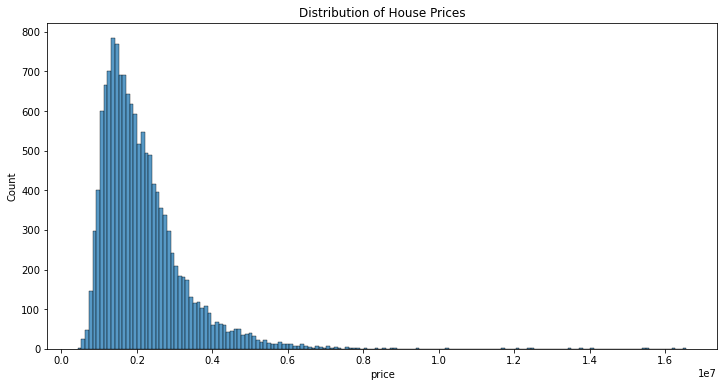

In [5]:
plt.figure(figsize=(12,6))
sns.histplot(train_data['price'])
plt.title('Distribution of House Prices')
plt.show()

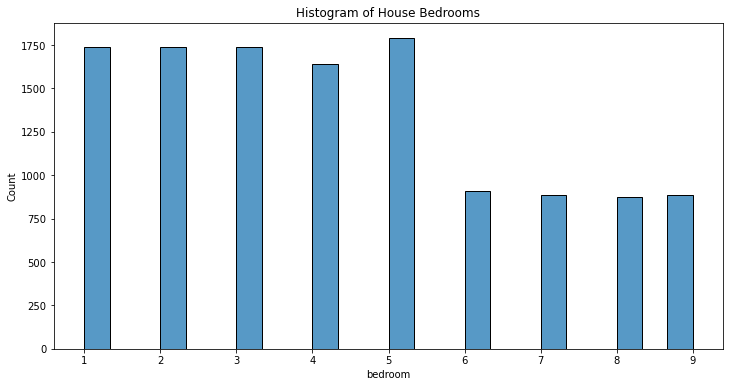

In [6]:
plt.figure(figsize=(12,6))
sns.histplot(train_data['bedroom'])
plt.title('Histogram of House Bedrooms')
plt.show()

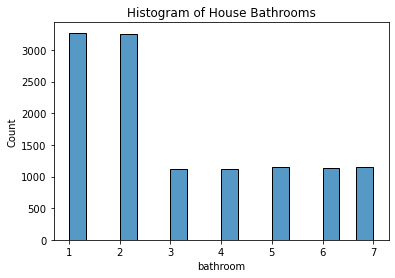

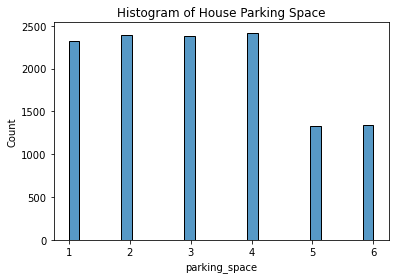

In [7]:
sns.histplot(train_data['bathroom'])
plt.title('Histogram of House Bathrooms')

plt.show()

sns.histplot(train_data['parking_space'])
plt.title('Histogram of House Parking Space')

plt.show()

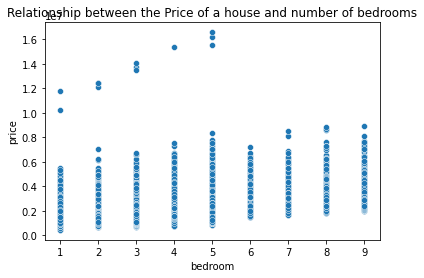

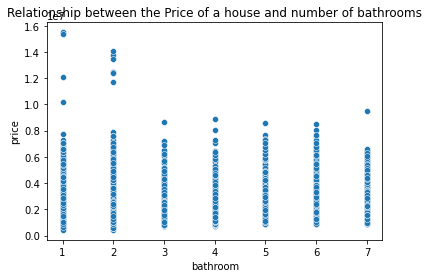

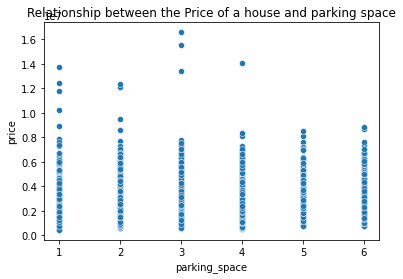

In [8]:
sns.scatterplot(x='bedroom', y='price', data=train_data)
plt.title('Relationship between the Price of a house and number of bedrooms')
plt.show()

sns.scatterplot(x='bathroom', y='price', data=train_data)
plt.title('Relationship between the Price of a house and number of bathrooms')
plt.show()

sns.scatterplot(x='parking_space', y='price', data=train_data)
plt.title('Relationship between the Price of a house and parking space')
plt.show()

In [9]:
# To quickly check the skewness of the dataset

cols_skewness_value = train_data.skew(numeric_only=True)
cols_skewness_value

ID               0.610108
bedroom          0.390922
bathroom         0.633202
parking_space    0.249415
price            2.451809
dtype: float64

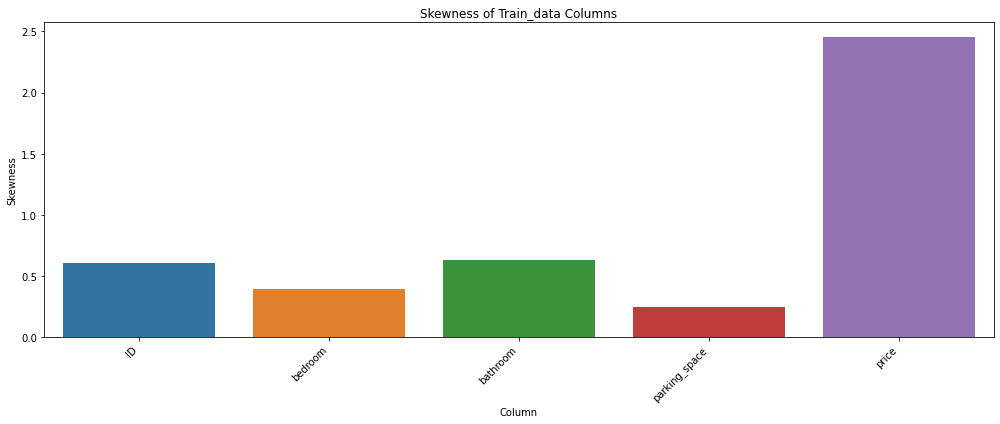

In [10]:
# To visualize the skewness of the data

plt.figure(figsize=(14, 6))
sns.barplot(x=cols_skewness_value.index, y=cols_skewness_value)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.title('Skewness of Train_data Columns')
plt.tight_layout()
plt.show()

DATA PREPROCESSING

In [11]:
# Here i dropped the rows containing missing values in the categorical columns

train_data.dropna(subset=['loc','title'],inplace=True)
train_data

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
5,1733,Borno,Mansion,NaN,1.0,3.0,1341750.867
...,...,...,...,...,...,...,...
13994,10477,Taraba,Detached duplex,8.0,1.0,6.0,2837199.086
13995,6175,Edo,Bungalow,NaN,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693


In [12]:
# Filling the rows containing missing values in the numerical columns with the median

num_cols = ['bedroom','bathroom','parking_space']
train_data[num_cols]=train_data[num_cols].fillna(train_data[num_cols].median())
train_data

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,4.0,2.0,4.0,1672416.689
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898
5,1733,Borno,Mansion,4.0,1.0,3.0,1341750.867
...,...,...,...,...,...,...,...
13994,10477,Taraba,Detached duplex,8.0,1.0,6.0,2837199.086
13995,6175,Edo,Bungalow,4.0,7.0,3.0,2367927.861
13996,9704,Kaduna,Apartment,4.0,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693


In [13]:
# Assigning the target to the variable y

y = train_data.price

In [14]:
# Here i dropped the ID column

Housing_train_data = train_data.drop(['ID'],axis=1)
Housing_train_data

,loc,title,bedroom,bathroom,parking_space,price
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,Ondo,Apartment,4.0,2.0,4.0,1672416.689
3,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898
5,Borno,Mansion,4.0,1.0,3.0,1341750.867
...,...,...,...,...,...,...
13994,Taraba,Detached duplex,8.0,1.0,6.0,2837199.086
13995,Edo,Bungalow,4.0,7.0,3.0,2367927.861
13996,Kaduna,Apartment,4.0,7.0,5.0,2228516.471
13997,Plateau,Bungalow,8.0,6.0,5.0,2406812.693


FEATURE ENGINEERING

In [15]:
# I created a new feature called "bed_bath_ratio" which is formed by dividing the number of bedrooms
# by the number of bathrooms.
# This feature considers both room to capture the overall space utilization

Housing_train_data['bed_bath_ratio'] = Housing_train_data['bedroom']/Housing_train_data['bathroom']
Housing_train_data

,loc,title,bedroom,bathroom,parking_space,price,bed_bath_ratio
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1.000000
1,Ondo,Apartment,4.0,2.0,4.0,1672416.689,2.000000
3,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,2.500000
4,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898,0.800000
5,Borno,Mansion,4.0,1.0,3.0,1341750.867,4.000000
...,...,...,...,...,...,...,...
13994,Taraba,Detached duplex,8.0,1.0,6.0,2837199.086,8.000000
13995,Edo,Bungalow,4.0,7.0,3.0,2367927.861,0.571429
13996,Kaduna,Apartment,4.0,7.0,5.0,2228516.471,0.571429
13997,Plateau,Bungalow,8.0,6.0,5.0,2406812.693,1.333333


In [16]:
# I created a new feature called "house_size" which is formed by adding the numbers of bedroom,
# bathrooms, and parking spaces. This feature provides the overall capacity of the house.

Housing_train_data['house_size'] = Housing_train_data['bedroom'] + Housing_train_data['bathroom'] + Housing_train_data['parking_space']
Housing_train_data

,loc,title,bedroom,bathroom,parking_space,price,bed_bath_ratio,house_size
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1.000000,5.0
1,Ondo,Apartment,4.0,2.0,4.0,1672416.689,2.000000,10.0
3,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,2.500000,11.0
4,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898,0.800000,15.0
5,Borno,Mansion,4.0,1.0,3.0,1341750.867,4.000000,8.0
...,...,...,...,...,...,...,...,...
13994,Taraba,Detached duplex,8.0,1.0,6.0,2837199.086,8.000000,15.0
13995,Edo,Bungalow,4.0,7.0,3.0,2367927.861,0.571429,14.0
13996,Kaduna,Apartment,4.0,7.0,5.0,2228516.471,0.571429,16.0
13997,Plateau,Bungalow,8.0,6.0,5.0,2406812.693,1.333333,19.0


In [17]:
# This feature is created by incorporating both the relative balance of bedrooms to bathrooms and the
# overall size of the house.

Housing_train_data['convenience'] = Housing_train_data['bed_bath_ratio'] * Housing_train_data['house_size']
Housing_train_data

,loc,title,bedroom,bathroom,parking_space,price,bed_bath_ratio,house_size,convenience
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1.000000,5.0,5.000000
1,Ondo,Apartment,4.0,2.0,4.0,1672416.689,2.000000,10.0,20.000000
3,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,2.500000,11.0,27.500000
4,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898,0.800000,15.0,12.000000
5,Borno,Mansion,4.0,1.0,3.0,1341750.867,4.000000,8.0,32.000000
...,...,...,...,...,...,...,...,...,...
13994,Taraba,Detached duplex,8.0,1.0,6.0,2837199.086,8.000000,15.0,120.000000
13995,Edo,Bungalow,4.0,7.0,3.0,2367927.861,0.571429,14.0,8.000000
13996,Kaduna,Apartment,4.0,7.0,5.0,2228516.471,0.571429,16.0,9.142857
13997,Plateau,Bungalow,8.0,6.0,5.0,2406812.693,1.333333,19.0,25.333333


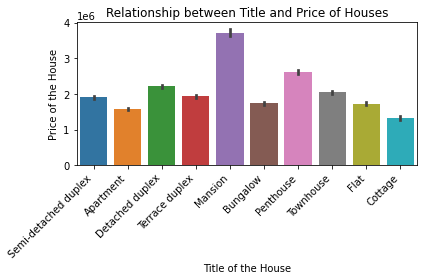

In [18]:
#plt.figure(figsize=(10,8))

sns.barplot(x='title', y='price', data=Housing_train_data)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Title of the House')
plt.ylabel('Price of the House')
plt.title('Relationship between Title and Price of Houses')
plt.tight_layout()
plt.show()

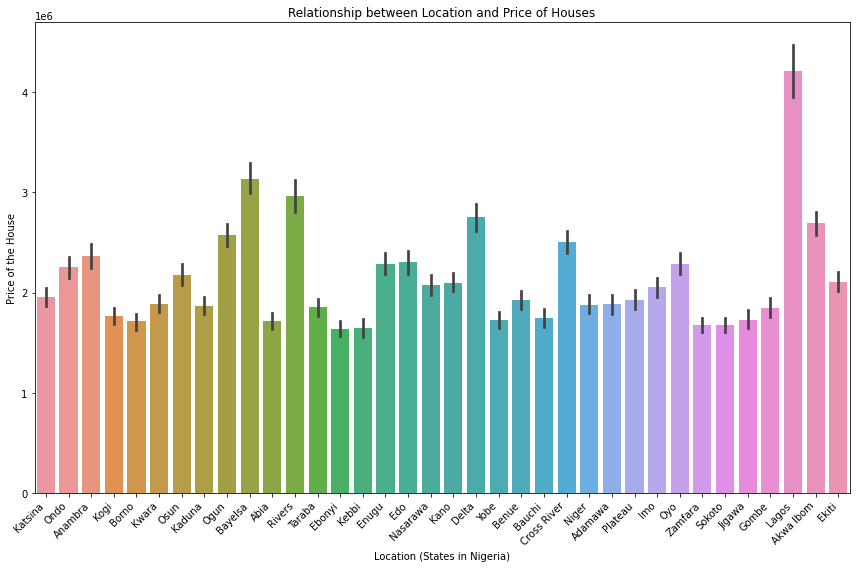

In [19]:
plt.figure(figsize=(12,8))
sns.barplot(x='loc', y='price', data=Housing_train_data)
plt.xticks(rotation=45,ha='right')
plt.xlabel('Location (States in Nigeria)')
plt.ylabel('Price of the House')
plt.title('Relationship between Location and Price of Houses')
plt.tight_layout()
plt.show()

ENCODING ALL CATEGORICAL COLUMNS

In [20]:
#Target encoding the 'loc' column

loc_target_encode = Housing_train_data.groupby('loc')['price'].median()
Housing_train_data['loc_encoded'] = Housing_train_data['loc'].map(loc_target_encode)
Housing_train_data

,loc,title,bedroom,bathroom,parking_space,price,bed_bath_ratio,house_size,convenience,loc_encoded
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1.000000,5.0,5.000000,1.780685e+06
1,Ondo,Apartment,4.0,2.0,4.0,1672416.689,2.000000,10.0,20.000000,2.118302e+06
3,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,2.500000,11.0,27.500000,2.086992e+06
4,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898,0.800000,15.0,12.000000,1.594661e+06
5,Borno,Mansion,4.0,1.0,3.0,1341750.867,4.000000,8.0,32.000000,1.476889e+06
...,...,...,...,...,...,...,...,...,...,...
13994,Taraba,Detached duplex,8.0,1.0,6.0,2837199.086,8.000000,15.0,120.000000,1.675506e+06
13995,Edo,Bungalow,4.0,7.0,3.0,2367927.861,0.571429,14.0,8.000000,2.009281e+06
13996,Kaduna,Apartment,4.0,7.0,5.0,2228516.471,0.571429,16.0,9.142857,1.653935e+06
13997,Plateau,Bungalow,8.0,6.0,5.0,2406812.693,1.333333,19.0,25.333333,1.723754e+06


In [21]:
#Target encoding the title column

title_target_encode = Housing_train_data.groupby('title')['price'].median()
Housing_train_data['title_encoded'] = Housing_train_data['title'].map(title_target_encode)
Housing_train_data

,loc,title,bedroom,bathroom,parking_space,price,bed_bath_ratio,house_size,convenience,loc_encoded,title_encoded
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1.000000,5.0,5.000000,1.780685e+06,1.751828e+06
1,Ondo,Apartment,4.0,2.0,4.0,1672416.689,2.000000,10.0,20.000000,2.118302e+06,1.461717e+06
3,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,2.500000,11.0,27.500000,2.086992e+06,2.066907e+06
4,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898,0.800000,15.0,12.000000,1.594661e+06,1.790421e+06
5,Borno,Mansion,4.0,1.0,3.0,1341750.867,4.000000,8.0,32.000000,1.476889e+06,3.591184e+06
...,...,...,...,...,...,...,...,...,...,...,...
13994,Taraba,Detached duplex,8.0,1.0,6.0,2837199.086,8.000000,15.0,120.000000,1.675506e+06,2.066907e+06
13995,Edo,Bungalow,4.0,7.0,3.0,2367927.861,0.571429,14.0,8.000000,2.009281e+06,1.621742e+06
13996,Kaduna,Apartment,4.0,7.0,5.0,2228516.471,0.571429,16.0,9.142857,1.653935e+06,1.461717e+06
13997,Plateau,Bungalow,8.0,6.0,5.0,2406812.693,1.333333,19.0,25.333333,1.723754e+06,1.621742e+06


In [22]:
# Dropping the categorical columns and the target

encoded_train_data = Housing_train_data.drop(['title','loc','price'], axis=1)
encoded_train_data

,bedroom,bathroom,parking_space,bed_bath_ratio,house_size,convenience,loc_encoded,title_encoded
0,2.0,2.0,1.0,1.000000,5.0,5.000000,1.780685e+06,1.751828e+06
1,4.0,2.0,4.0,2.000000,10.0,20.000000,2.118302e+06,1.461717e+06
3,5.0,2.0,4.0,2.500000,11.0,27.500000,2.086992e+06,2.066907e+06
4,4.0,5.0,6.0,0.800000,15.0,12.000000,1.594661e+06,1.790421e+06
5,4.0,1.0,3.0,4.000000,8.0,32.000000,1.476889e+06,3.591184e+06
...,...,...,...,...,...,...,...,...
13994,8.0,1.0,6.0,8.000000,15.0,120.000000,1.675506e+06,2.066907e+06
13995,4.0,7.0,3.0,0.571429,14.0,8.000000,2.009281e+06,1.621742e+06
13996,4.0,7.0,5.0,0.571429,16.0,9.142857,1.653935e+06,1.461717e+06
13997,8.0,6.0,5.0,1.333333,19.0,25.333333,1.723754e+06,1.621742e+06


In [27]:
# Instantiating a catboost regressor model

my_model = CatBoostRegressor(random_state=50)

In [28]:
# Assigning a range of values for the catboost regressor parameters.

param_dist = {
    'learning_rate': np.linspace(0.01, 0.3, num=10),
    'depth': range(4, 11),
    'iterations': range(100, 1001, 10),
    'l2_leaf_reg': np.logspace(-3, 3, num=7),
    'border_count': [32, 64, 128]
}

'learning_rate': Learning rate controls the step size in the gradient descent optimization process. It scales the contribution of each tree during training, with a lower value making the model more robust but requiring more iterations to converge.

'depth': Depth determines the maximum depth of each decision tree. Higher values can lead to more complex models with better training performance but may increase the risk of overfitting.

'iterations': Iterations specify the number of boosting rounds during training. More iterations can improve model performance but might increase training time.

'l2_leaf_reg': L2 regularization term added to the loss function. It helps prevent overfitting by penalizing large weights.

'border_count': Border count is the number of splits to consider for categorical features. Higher values increase model accuracy at the cost of more memory usage.


In [29]:
# I used randomsearchcv to determine the best values for the parameters

#random_search = RandomizedSearchCV(estimator = my_model,param_distributions=param_dist,cv=5,n_iter=10,scoring="neg_mean_squared_error")

In [ ]:
# Fitting the model to output the best values for the parameters

#random_search.fit(encoded_train_data,y)

In [31]:
best_params = random_search.best_params_
best_score = -1*random_search.best_score_

In [23]:
# Instantiating the catboost regressor model with parameter values
# Hyper-parameter tuning....

catboost_model = CatBoostRegressor(learning_rate=0.07444444444444444,l2_leaf_reg=0.001,
iterations = 320, depth = 7,border_count = 128)

In [24]:
# Performing cross-validation to see how well my model will generalize on the dataset

scores = -1 * cross_val_score(catboost_model,encoded_train_data,y,cv=5,scoring="neg_mean_squared_error")
scores

0:	learn: 1001278.3328215	total: 305ms	remaining: 1m 37s
1:	learn: 948858.6828738	total: 315ms	remaining: 50.1s
2:	learn: 901998.5825570	total: 326ms	remaining: 34.4s
3:	learn: 857522.0848731	total: 336ms	remaining: 26.5s
4:	learn: 815711.3542706	total: 345ms	remaining: 21.8s
5:	learn: 778310.2714398	total: 356ms	remaining: 18.6s
6:	learn: 743704.8973155	total: 368ms	remaining: 16.5s
7:	learn: 709969.2458397	total: 378ms	remaining: 14.7s
8:	learn: 681374.7511339	total: 387ms	remaining: 13.4s
9:	learn: 654583.5457205	total: 398ms	remaining: 12.3s
10:	learn: 629452.0725153	total: 408ms	remaining: 11.5s
11:	learn: 607010.1742925	total: 419ms	remaining: 10.8s
12:	learn: 586408.1917938	total: 428ms	remaining: 10.1s
13:	learn: 568360.5651640	total: 439ms	remaining: 9.59s
14:	learn: 550335.1616456	total: 448ms	remaining: 9.1s
15:	learn: 536034.7100619	total: 457ms	remaining: 8.68s
16:	learn: 521484.4743374	total: 466ms	remaining: 8.31s
17:	learn: 508906.9644555	total: 476ms	remaining: 7.98s
1

152:	learn: 329564.6754625	total: 1.94s	remaining: 2.12s
153:	learn: 328999.4791296	total: 1.95s	remaining: 2.1s
154:	learn: 328467.6083255	total: 1.96s	remaining: 2.09s
155:	learn: 328124.1065847	total: 1.97s	remaining: 2.07s
156:	learn: 327915.1878146	total: 1.98s	remaining: 2.06s
157:	learn: 327338.9852742	total: 2s	remaining: 2.05s
158:	learn: 326844.3557400	total: 2.01s	remaining: 2.04s
159:	learn: 326679.7288422	total: 2.02s	remaining: 2.02s
160:	learn: 326450.7294500	total: 2.03s	remaining: 2.01s
161:	learn: 326018.6211700	total: 2.04s	remaining: 1.99s
162:	learn: 325663.3706986	total: 2.05s	remaining: 1.98s
163:	learn: 325452.8422128	total: 2.06s	remaining: 1.96s
164:	learn: 325240.8147516	total: 2.07s	remaining: 1.95s
165:	learn: 325064.1804555	total: 2.08s	remaining: 1.93s
166:	learn: 324756.9985819	total: 2.09s	remaining: 1.92s
167:	learn: 324529.4515714	total: 2.1s	remaining: 1.9s
168:	learn: 323927.0321945	total: 2.12s	remaining: 1.89s
169:	learn: 323679.4975523	total: 2.1

309:	learn: 288448.4639756	total: 3.78s	remaining: 122ms
310:	learn: 288317.1702342	total: 3.79s	remaining: 110ms
311:	learn: 288197.3683973	total: 3.81s	remaining: 97.6ms
312:	learn: 288065.4282534	total: 3.82s	remaining: 85.3ms
313:	learn: 287792.5437536	total: 3.83s	remaining: 73.1ms
314:	learn: 287595.5082429	total: 3.84s	remaining: 61ms
315:	learn: 287495.2703802	total: 3.86s	remaining: 48.8ms
316:	learn: 287145.5426436	total: 3.87s	remaining: 36.6ms
317:	learn: 286981.7009381	total: 3.88s	remaining: 24.4ms
318:	learn: 286725.9557500	total: 3.89s	remaining: 12.2ms
319:	learn: 286544.7676452	total: 3.9s	remaining: 0us
0:	learn: 1021190.1708494	total: 14.9ms	remaining: 4.76s
1:	learn: 968164.9510653	total: 27.4ms	remaining: 4.36s
2:	learn: 921032.7118868	total: 37.9ms	remaining: 4s
3:	learn: 878133.5658239	total: 49.9ms	remaining: 3.94s
4:	learn: 835159.3600873	total: 59ms	remaining: 3.71s
5:	learn: 798234.0347023	total: 68.9ms	remaining: 3.6s
6:	learn: 763177.0674290	total: 78ms	re

151:	learn: 333447.5423649	total: 1.69s	remaining: 1.87s
152:	learn: 332822.4756333	total: 1.7s	remaining: 1.85s
153:	learn: 332665.2512343	total: 1.71s	remaining: 1.84s
154:	learn: 332292.5369906	total: 1.72s	remaining: 1.83s
155:	learn: 331910.2939195	total: 1.73s	remaining: 1.82s
156:	learn: 331799.8739676	total: 1.74s	remaining: 1.81s
157:	learn: 331544.4465225	total: 1.75s	remaining: 1.79s
158:	learn: 331328.8828106	total: 1.76s	remaining: 1.78s
159:	learn: 331096.6329828	total: 1.77s	remaining: 1.77s
160:	learn: 330605.6569060	total: 1.78s	remaining: 1.76s
161:	learn: 330433.0883266	total: 1.79s	remaining: 1.75s
162:	learn: 330198.0663044	total: 1.8s	remaining: 1.73s
163:	learn: 329801.8679804	total: 1.81s	remaining: 1.72s
164:	learn: 329564.5164635	total: 1.82s	remaining: 1.71s
165:	learn: 329193.4526433	total: 1.83s	remaining: 1.7s
166:	learn: 328971.2434439	total: 1.84s	remaining: 1.68s
167:	learn: 328764.0010011	total: 1.85s	remaining: 1.67s
168:	learn: 328524.2905575	total: 

299:	learn: 297007.5710088	total: 3.36s	remaining: 224ms
300:	learn: 296773.4504067	total: 3.38s	remaining: 213ms
301:	learn: 296566.7919222	total: 3.39s	remaining: 202ms
302:	learn: 296368.8602424	total: 3.4s	remaining: 191ms
303:	learn: 296140.8043571	total: 3.41s	remaining: 179ms
304:	learn: 295930.3431663	total: 3.42s	remaining: 168ms
305:	learn: 295649.0001297	total: 3.43s	remaining: 157ms
306:	learn: 295365.4016643	total: 3.44s	remaining: 146ms
307:	learn: 295242.3218552	total: 3.46s	remaining: 135ms
308:	learn: 295029.2475361	total: 3.47s	remaining: 123ms
309:	learn: 294820.7538102	total: 3.48s	remaining: 112ms
310:	learn: 294523.6697800	total: 3.48s	remaining: 101ms
311:	learn: 294186.5502460	total: 3.49s	remaining: 89.6ms
312:	learn: 293874.1641492	total: 3.5s	remaining: 78.4ms
313:	learn: 293638.7677831	total: 3.51s	remaining: 67.1ms
314:	learn: 293376.3589066	total: 3.52s	remaining: 55.9ms
315:	learn: 293139.8999522	total: 3.53s	remaining: 44.7ms
316:	learn: 292964.5462601	t

125:	learn: 337049.1303305	total: 1.31s	remaining: 2.02s
126:	learn: 336589.6622705	total: 1.32s	remaining: 2.01s
127:	learn: 336337.4478525	total: 1.33s	remaining: 2s
128:	learn: 336053.9694333	total: 1.35s	remaining: 2s
129:	learn: 335689.2407970	total: 1.36s	remaining: 1.99s
130:	learn: 335304.8606222	total: 1.37s	remaining: 1.98s
131:	learn: 334882.3654316	total: 1.38s	remaining: 1.97s
132:	learn: 334707.4045833	total: 1.39s	remaining: 1.96s
133:	learn: 334155.2355876	total: 1.4s	remaining: 1.95s
134:	learn: 333909.6910604	total: 1.41s	remaining: 1.93s
135:	learn: 333743.8744271	total: 1.42s	remaining: 1.92s
136:	learn: 333148.2718355	total: 1.43s	remaining: 1.91s
137:	learn: 332812.9310028	total: 1.44s	remaining: 1.9s
138:	learn: 332627.6007766	total: 1.45s	remaining: 1.89s
139:	learn: 332326.7537569	total: 1.46s	remaining: 1.87s
140:	learn: 331858.8971017	total: 1.47s	remaining: 1.86s
141:	learn: 331530.9991789	total: 1.48s	remaining: 1.85s
142:	learn: 331027.8229241	total: 1.49s

280:	learn: 297356.1701185	total: 2.93s	remaining: 407ms
281:	learn: 297088.6511206	total: 2.94s	remaining: 396ms
282:	learn: 296848.9310002	total: 2.95s	remaining: 386ms
283:	learn: 296623.4325318	total: 2.96s	remaining: 376ms
284:	learn: 296287.1228806	total: 2.98s	remaining: 366ms
285:	learn: 296031.5365953	total: 2.99s	remaining: 355ms
286:	learn: 295878.7607957	total: 3s	remaining: 345ms
287:	learn: 295781.7420638	total: 3.01s	remaining: 334ms
288:	learn: 295633.5508297	total: 3.02s	remaining: 324ms
289:	learn: 295520.1535800	total: 3.03s	remaining: 313ms
290:	learn: 295341.4201381	total: 3.04s	remaining: 303ms
291:	learn: 295144.9372602	total: 3.05s	remaining: 292ms
292:	learn: 294911.8553047	total: 3.06s	remaining: 282ms
293:	learn: 294658.5066315	total: 3.06s	remaining: 271ms
294:	learn: 294383.2193584	total: 3.07s	remaining: 260ms
295:	learn: 294241.5220206	total: 3.08s	remaining: 250ms
296:	learn: 293981.6637425	total: 3.09s	remaining: 239ms
297:	learn: 293779.2260260	total: 

112:	learn: 341149.7447310	total: 1.15s	remaining: 2.1s
113:	learn: 340753.4438582	total: 1.16s	remaining: 2.09s
114:	learn: 340472.4504217	total: 1.17s	remaining: 2.08s
115:	learn: 340181.8695334	total: 1.18s	remaining: 2.07s
116:	learn: 340018.8559212	total: 1.19s	remaining: 2.07s
117:	learn: 339766.4701524	total: 1.2s	remaining: 2.05s
118:	learn: 339164.3643901	total: 1.21s	remaining: 2.04s
119:	learn: 339002.5104104	total: 1.22s	remaining: 2.03s
120:	learn: 337953.5079129	total: 1.23s	remaining: 2.02s
121:	learn: 337272.8539893	total: 1.24s	remaining: 2.01s
122:	learn: 336678.2312103	total: 1.25s	remaining: 2s
123:	learn: 336142.0319820	total: 1.26s	remaining: 1.99s
124:	learn: 335510.0995139	total: 1.27s	remaining: 1.98s
125:	learn: 335405.1066427	total: 1.27s	remaining: 1.96s
126:	learn: 334882.6761209	total: 1.28s	remaining: 1.95s
127:	learn: 334666.3863560	total: 1.29s	remaining: 1.94s
128:	learn: 334088.2929634	total: 1.3s	remaining: 1.93s
129:	learn: 333584.1274734	total: 1.3

260:	learn: 296558.0488862	total: 2.81s	remaining: 636ms
261:	learn: 296447.3699115	total: 2.82s	remaining: 625ms
262:	learn: 296213.7474688	total: 2.83s	remaining: 614ms
263:	learn: 295914.4727863	total: 2.84s	remaining: 603ms
264:	learn: 295851.1729822	total: 2.85s	remaining: 593ms
265:	learn: 295617.4769720	total: 2.87s	remaining: 582ms
266:	learn: 295405.6791086	total: 2.87s	remaining: 571ms
267:	learn: 295098.7715514	total: 2.88s	remaining: 560ms
268:	learn: 294723.1259428	total: 2.9s	remaining: 549ms
269:	learn: 294476.0620430	total: 2.91s	remaining: 539ms
270:	learn: 294097.4605097	total: 2.92s	remaining: 528ms
271:	learn: 293969.6345402	total: 2.93s	remaining: 518ms
272:	learn: 293681.9320300	total: 2.94s	remaining: 507ms
273:	learn: 293456.6394676	total: 2.95s	remaining: 496ms
274:	learn: 293144.2678764	total: 2.96s	remaining: 485ms
275:	learn: 292925.4047468	total: 2.98s	remaining: 474ms
276:	learn: 292690.1477503	total: 2.99s	remaining: 464ms
277:	learn: 292487.3108253	total

92:	learn: 357999.1611632	total: 930ms	remaining: 2.27s
93:	learn: 356908.7844465	total: 939ms	remaining: 2.26s
94:	learn: 356211.4005401	total: 949ms	remaining: 2.25s
95:	learn: 356045.1206190	total: 960ms	remaining: 2.24s
96:	learn: 356032.8642866	total: 966ms	remaining: 2.22s
97:	learn: 355312.5677699	total: 979ms	remaining: 2.22s
98:	learn: 354223.9985933	total: 990ms	remaining: 2.21s
99:	learn: 354183.3534417	total: 999ms	remaining: 2.2s
100:	learn: 353594.3046276	total: 1.01s	remaining: 2.19s
101:	learn: 353267.9594873	total: 1.02s	remaining: 2.18s
102:	learn: 352528.6690993	total: 1.03s	remaining: 2.17s
103:	learn: 351969.7935691	total: 1.04s	remaining: 2.16s
104:	learn: 351740.3462707	total: 1.05s	remaining: 2.15s
105:	learn: 351656.6973074	total: 1.06s	remaining: 2.14s
106:	learn: 351146.1331985	total: 1.07s	remaining: 2.13s
107:	learn: 350651.9131519	total: 1.08s	remaining: 2.12s
108:	learn: 350545.9220648	total: 1.09s	remaining: 2.12s
109:	learn: 350326.2331856	total: 1.11s	

253:	learn: 305901.2585770	total: 2.57s	remaining: 668ms
254:	learn: 305625.6514399	total: 2.58s	remaining: 658ms
255:	learn: 305324.1584205	total: 2.59s	remaining: 648ms
256:	learn: 305025.7639141	total: 2.6s	remaining: 638ms
257:	learn: 304867.7936131	total: 2.62s	remaining: 628ms
258:	learn: 304579.0945189	total: 2.62s	remaining: 618ms
259:	learn: 304317.7791932	total: 2.63s	remaining: 608ms
260:	learn: 304058.0238285	total: 2.64s	remaining: 597ms
261:	learn: 303472.6734210	total: 2.65s	remaining: 587ms
262:	learn: 303189.6849884	total: 2.66s	remaining: 577ms
263:	learn: 303024.4422274	total: 2.67s	remaining: 566ms
264:	learn: 302904.3096565	total: 2.68s	remaining: 556ms
265:	learn: 302528.8639198	total: 2.69s	remaining: 546ms
266:	learn: 302476.5889187	total: 2.7s	remaining: 535ms
267:	learn: 302329.6468977	total: 2.71s	remaining: 525ms
268:	learn: 302219.1930787	total: 2.71s	remaining: 515ms
269:	learn: 301998.0676330	total: 2.72s	remaining: 505ms
270:	learn: 301762.3578105	total:

array([2.00327107e+11, 1.37435995e+11, 2.08900681e+11, 1.69693031e+11,
       1.89173142e+11])

In [25]:
x = scores.mean()
x

181105991019.4411

In [26]:
fin = np.sqrt(x)
fin

425565.4955696492

In [27]:
#fitting the catboost model

catboost_model.fit(encoded_train_data,y)

0:	learn: 1009736.3967256	total: 28ms	remaining: 8.94s
1:	learn: 956946.5108193	total: 46.9ms	remaining: 7.46s
2:	learn: 910193.7637050	total: 63ms	remaining: 6.66s
3:	learn: 864046.2388185	total: 78.6ms	remaining: 6.21s
4:	learn: 821374.9691160	total: 91.5ms	remaining: 5.76s
5:	learn: 783671.5897365	total: 103ms	remaining: 5.41s
6:	learn: 749286.6402916	total: 117ms	remaining: 5.24s
7:	learn: 718441.5709228	total: 130ms	remaining: 5.06s
8:	learn: 688154.2205429	total: 142ms	remaining: 4.91s
9:	learn: 659526.6301967	total: 156ms	remaining: 4.84s
10:	learn: 634822.5668077	total: 170ms	remaining: 4.79s
11:	learn: 611574.6495970	total: 186ms	remaining: 4.78s
12:	learn: 590934.9729366	total: 201ms	remaining: 4.74s
13:	learn: 572193.9466481	total: 215ms	remaining: 4.69s
14:	learn: 554806.6079756	total: 231ms	remaining: 4.69s
15:	learn: 538463.3209292	total: 245ms	remaining: 4.66s
16:	learn: 524769.1106408	total: 259ms	remaining: 4.62s
17:	learn: 512384.8840235	total: 277ms	remaining: 4.65s


146:	learn: 342214.0728364	total: 2.16s	remaining: 2.54s
147:	learn: 341632.6508458	total: 2.17s	remaining: 2.53s
148:	learn: 341401.0647193	total: 2.19s	remaining: 2.51s
149:	learn: 341091.1846659	total: 2.21s	remaining: 2.5s
150:	learn: 340174.7188654	total: 2.23s	remaining: 2.49s
151:	learn: 339508.1142786	total: 2.24s	remaining: 2.48s
152:	learn: 339341.7094758	total: 2.26s	remaining: 2.47s
153:	learn: 339125.3202597	total: 2.27s	remaining: 2.45s
154:	learn: 338851.0184442	total: 2.29s	remaining: 2.44s
155:	learn: 338341.6097315	total: 2.3s	remaining: 2.42s
156:	learn: 338011.9203022	total: 2.31s	remaining: 2.4s
157:	learn: 337539.8789317	total: 2.33s	remaining: 2.38s
158:	learn: 337080.2352470	total: 2.34s	remaining: 2.37s
159:	learn: 336322.9076301	total: 2.36s	remaining: 2.36s
160:	learn: 336093.4664768	total: 2.37s	remaining: 2.34s
161:	learn: 336010.2343898	total: 2.39s	remaining: 2.33s
162:	learn: 335817.5730308	total: 2.4s	remaining: 2.31s
163:	learn: 335640.3523866	total: 2

299:	learn: 305560.8642152	total: 4.23s	remaining: 282ms
300:	learn: 305459.2547550	total: 4.25s	remaining: 268ms
301:	learn: 305122.5321662	total: 4.26s	remaining: 254ms
302:	learn: 304928.3514348	total: 4.27s	remaining: 240ms
303:	learn: 304674.8989731	total: 4.29s	remaining: 226ms
304:	learn: 304567.1955729	total: 4.3s	remaining: 211ms
305:	learn: 304294.4107824	total: 4.31s	remaining: 197ms
306:	learn: 304044.0274097	total: 4.32s	remaining: 183ms
307:	learn: 303877.3651398	total: 4.33s	remaining: 169ms
308:	learn: 303765.1005978	total: 4.35s	remaining: 155ms
309:	learn: 303513.1618929	total: 4.36s	remaining: 141ms
310:	learn: 303406.5237954	total: 4.37s	remaining: 126ms
311:	learn: 303175.4603624	total: 4.38s	remaining: 112ms
312:	learn: 302901.0922136	total: 4.39s	remaining: 98.3ms
313:	learn: 302815.4076292	total: 4.41s	remaining: 84.2ms
314:	learn: 302768.4836175	total: 4.42s	remaining: 70.2ms
315:	learn: 302670.2421659	total: 4.43s	remaining: 56.1ms
316:	learn: 302574.2412484	t

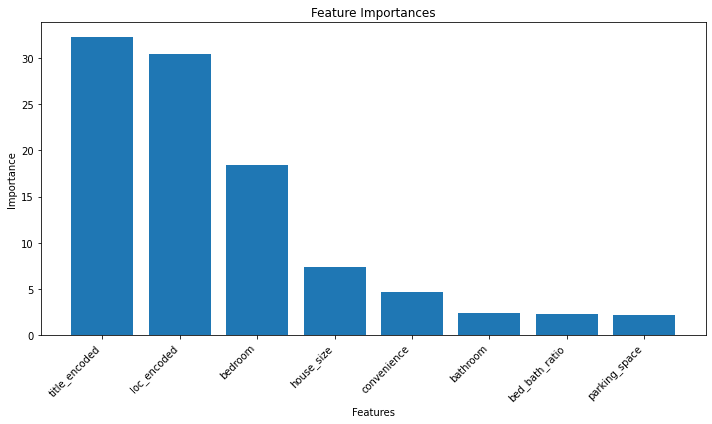

In [28]:
feature_importances = catboost_model.feature_importances_

# Creating a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': encoded_train_data.columns, 'Importance': feature_importances})

# Sorting the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [29]:
# Loading the test data into a dataframe

test_data = pd.read_csv("C:/Users/CHUKS/Downloads/free-ai-classes-in-every-city-hackathon-2023/Housing_dataset_test.csv")
test_data

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1
...,...,...,...,...,...,...
5995,1594,Ekiti,Flat,4,5,2
5996,2416,Adamawa,Terrace duplex,5,7,1
5997,10195,Oyo,Townhouse,4,1,4
5998,9455,Bauchi,Flat,3,7,5


In [30]:
# Dropping the 'ID' column

testing_data = test_data.drop(['ID'],axis='columns')
testing_data

,loc,title,bedroom,bathroom,parking_space
0,Kano,Penthouse,4,1,2
1,Adamawa,Apartment,2,2,4
2,Adamawa,Bungalow,2,7,2
3,Lagos,Mansion,9,5,2
4,Gombe,Semi-detached duplex,5,6,1
...,...,...,...,...,...
5995,Ekiti,Flat,4,5,2
5996,Adamawa,Terrace duplex,5,7,1
5997,Oyo,Townhouse,4,1,4
5998,Bauchi,Flat,3,7,5


In [31]:
testing_data['bed_bath_ratio'] = testing_data['bedroom'] / testing_data['bathroom']
testing_data

,loc,title,bedroom,bathroom,parking_space,bed_bath_ratio
0,Kano,Penthouse,4,1,2,4.000000
1,Adamawa,Apartment,2,2,4,1.000000
2,Adamawa,Bungalow,2,7,2,0.285714
3,Lagos,Mansion,9,5,2,1.800000
4,Gombe,Semi-detached duplex,5,6,1,0.833333
...,...,...,...,...,...,...
5995,Ekiti,Flat,4,5,2,0.800000
5996,Adamawa,Terrace duplex,5,7,1,0.714286
5997,Oyo,Townhouse,4,1,4,4.000000
5998,Bauchi,Flat,3,7,5,0.428571


In [32]:
testing_data['house_size'] = testing_data['bedroom'] + testing_data['bathroom'] + testing_data['parking_space']
testing_data

,loc,title,bedroom,bathroom,parking_space,bed_bath_ratio,house_size
0,Kano,Penthouse,4,1,2,4.000000,7
1,Adamawa,Apartment,2,2,4,1.000000,8
2,Adamawa,Bungalow,2,7,2,0.285714,11
3,Lagos,Mansion,9,5,2,1.800000,16
4,Gombe,Semi-detached duplex,5,6,1,0.833333,12
...,...,...,...,...,...,...,...
5995,Ekiti,Flat,4,5,2,0.800000,11
5996,Adamawa,Terrace duplex,5,7,1,0.714286,13
5997,Oyo,Townhouse,4,1,4,4.000000,9
5998,Bauchi,Flat,3,7,5,0.428571,15


In [33]:
testing_data['convenience'] = testing_data['bed_bath_ratio'] * testing_data['house_size']
testing_data

,loc,title,bedroom,bathroom,parking_space,bed_bath_ratio,house_size,convenience
0,Kano,Penthouse,4,1,2,4.000000,7,28.000000
1,Adamawa,Apartment,2,2,4,1.000000,8,8.000000
2,Adamawa,Bungalow,2,7,2,0.285714,11,3.142857
3,Lagos,Mansion,9,5,2,1.800000,16,28.800000
4,Gombe,Semi-detached duplex,5,6,1,0.833333,12,10.000000
...,...,...,...,...,...,...,...,...
5995,Ekiti,Flat,4,5,2,0.800000,11,8.800000
5996,Adamawa,Terrace duplex,5,7,1,0.714286,13,9.285714
5997,Oyo,Townhouse,4,1,4,4.000000,9,36.000000
5998,Bauchi,Flat,3,7,5,0.428571,15,6.428571


In [34]:
# Target encoding the 'loc' column

testing_data['loc_encoded'] = testing_data['loc'].map(loc_target_encode)
testing_data

,loc,title,bedroom,bathroom,parking_space,bed_bath_ratio,house_size,convenience,loc_encoded
0,Kano,Penthouse,4,1,2,4.000000,7,28.000000,1.975090e+06
1,Adamawa,Apartment,2,2,4,1.000000,8,8.000000,1.671004e+06
2,Adamawa,Bungalow,2,7,2,0.285714,11,3.142857,1.671004e+06
3,Lagos,Mansion,9,5,2,1.800000,16,28.800000,3.920999e+06
4,Gombe,Semi-detached duplex,5,6,1,0.833333,12,10.000000,1.660875e+06
...,...,...,...,...,...,...,...,...,...
5995,Ekiti,Flat,4,5,2,0.800000,11,8.800000,1.953749e+06
5996,Adamawa,Terrace duplex,5,7,1,0.714286,13,9.285714,1.671004e+06
5997,Oyo,Townhouse,4,1,4,4.000000,9,36.000000,1.973358e+06
5998,Bauchi,Flat,3,7,5,0.428571,15,6.428571,1.548004e+06


In [35]:
# Target encoding the 'title' column

testing_data['title_encoded'] = testing_data['title'].map(title_target_encode)
testing_data

,loc,title,bedroom,bathroom,parking_space,bed_bath_ratio,house_size,convenience,loc_encoded,title_encoded
0,Kano,Penthouse,4,1,2,4.000000,7,28.000000,1.975090e+06,2.479516e+06
1,Adamawa,Apartment,2,2,4,1.000000,8,8.000000,1.671004e+06,1.461717e+06
2,Adamawa,Bungalow,2,7,2,0.285714,11,3.142857,1.671004e+06,1.621742e+06
3,Lagos,Mansion,9,5,2,1.800000,16,28.800000,3.920999e+06,3.591184e+06
4,Gombe,Semi-detached duplex,5,6,1,0.833333,12,10.000000,1.660875e+06,1.751828e+06
...,...,...,...,...,...,...,...,...,...,...
5995,Ekiti,Flat,4,5,2,0.800000,11,8.800000,1.953749e+06,1.593675e+06
5996,Adamawa,Terrace duplex,5,7,1,0.714286,13,9.285714,1.671004e+06,1.790421e+06
5997,Oyo,Townhouse,4,1,4,4.000000,9,36.000000,1.973358e+06,1.914208e+06
5998,Bauchi,Flat,3,7,5,0.428571,15,6.428571,1.548004e+06,1.593675e+06


In [36]:
# Dropped the categorical columns present in the test data.

encoded_testing_data = testing_data.drop(['loc','title'],axis=1)
encoded_testing_data

,bedroom,bathroom,parking_space,bed_bath_ratio,house_size,convenience,loc_encoded,title_encoded
0,4,1,2,4.000000,7,28.000000,1.975090e+06,2.479516e+06
1,2,2,4,1.000000,8,8.000000,1.671004e+06,1.461717e+06
2,2,7,2,0.285714,11,3.142857,1.671004e+06,1.621742e+06
3,9,5,2,1.800000,16,28.800000,3.920999e+06,3.591184e+06
4,5,6,1,0.833333,12,10.000000,1.660875e+06,1.751828e+06
...,...,...,...,...,...,...,...,...
5995,4,5,2,0.800000,11,8.800000,1.953749e+06,1.593675e+06
5996,5,7,1,0.714286,13,9.285714,1.671004e+06,1.790421e+06
5997,4,1,4,4.000000,9,36.000000,1.973358e+06,1.914208e+06
5998,3,7,5,0.428571,15,6.428571,1.548004e+06,1.593675e+06


In [37]:
# To make sure the alignment of the train and test data are the same

final_train,final_test = encoded_train_data.align(encoded_testing_data, join='inner', axis=1)

In [38]:
# Catboost model predicting the price.

test_preds = catboost_model.predict(encoded_testing_data)

In [39]:
# The 'ID' and 'price' are placed in a dataframe

output = pd.DataFrame({'ID':test_data.ID,'price':test_preds})
output

,ID,price
0,845,2.412780e+06
1,1924,1.040401e+06
2,10718,1.271992e+06
3,12076,8.423215e+06
4,12254,1.901025e+06
...,...,...
5995,1594,1.814890e+06
5996,2416,1.969828e+06
5997,10195,1.921691e+06
5998,9455,1.353454e+06


In [52]:
# converting the dataframe to a csv file

output.to_csv('C:/Users/CHUKS/Desktop/projects/submission055.csv',index=False)